In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset_2_1/bert_embeddings_2_1.csv")
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,labels
0,0,0.115522,0.120725,0.116916,0.028908,0.189101,0.138585,-0.069740,0.195568,-0.163388,...,-0.033318,0.111991,-0.008259,0.082657,-0.259868,-0.365855,0.307502,-0.118487,0.196395,defamation
1,1,-0.063305,-0.175854,0.539785,0.058090,0.223428,-0.125844,-0.226975,0.222206,-0.128272,...,0.437689,-0.107548,-0.479456,0.075470,-0.420229,0.009688,0.257897,0.094962,-0.263901,defamation
2,3,0.519776,-0.501478,0.305727,0.015040,0.528733,0.004844,-0.195037,0.621661,-0.250125,...,0.316832,-0.333766,-0.271076,-0.107719,-0.084357,-0.125359,0.202027,0.132137,-0.143496,defamation
3,4,0.314832,-0.107000,0.487415,-0.030075,-0.063889,0.226470,-0.116691,0.358502,-0.084642,...,0.124459,0.075300,0.117993,0.313323,-0.243439,-0.316153,0.457340,0.137131,-0.184802,defamation
4,5,-0.004540,-0.176425,0.351265,0.144485,0.396583,0.181429,0.105931,0.326533,-0.109663,...,0.223254,-0.133996,-0.159739,0.400618,-0.231794,-0.008590,0.246167,0.183157,0.050734,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,4041,-0.004737,-0.372562,0.313206,-0.020798,0.467158,0.213140,0.009189,0.108353,-0.355224,...,0.219093,-0.214236,-0.600473,0.129861,-0.284562,-0.110610,0.164652,-0.090044,-0.018130,defamation
1616,4042,-0.103641,0.594657,0.332227,-0.007513,0.214091,0.031883,-0.175174,0.130002,-0.123963,...,0.173265,0.092221,-0.088439,0.186820,-0.209777,-0.253530,0.278047,0.151621,-0.162491,fake
1617,4043,0.105243,-0.174593,0.196325,0.068952,0.208112,0.176256,-0.110949,0.294628,-0.366315,...,0.394137,-0.017774,-0.499330,0.038482,-0.356201,-0.058518,0.350813,-0.000070,0.013664,defamation
1618,4045,0.192417,-0.454516,0.184060,-0.002153,0.139672,0.099237,-0.223884,0.360114,-0.212044,...,-0.014932,0.136302,0.089186,0.243119,-0.267395,-0.105049,0.588393,0.379176,-0.108674,fake


In [ ]:
X=data.drop(["labels","Unnamed: 0"], axis=1)
y=data["labels"]

In [ ]:
for i in range(1620):
  if y[i] == 'fake':
    y[i] = int(1)
  else:
    y[i] = int(0)

<ipython-input-6-e3fb3919ab3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(0)
<ipython-input-6-e3fb3919ab3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(1)


In [ ]:
y = y.astype(str).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:

ttw1a = []
tw1a = []

ttw1p = []
tw1p = []

ttw1r = []
tw1r = []

ttw1f = []
tw1f = []


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Input, Embedding, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np



X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the model
model = Sequential()



# You can experiment with different RNN layers, like GRU and LSTM
model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))

# You can add more recurrent layers or adjust their parameters

# Flatten the output of the recurrent layers
model.add(tf.keras.layers.Flatten())

# Add dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Make predictions




Epoch 1/20
17/17 [==============================] - 28s 1s/step - loss: 0.6214 - accuracy: 0.6498 - val_loss: 0.6308 - val_accuracy: 0.6897
Epoch 2/20
17/17 [==============================] - 23s 1s/step - loss: 0.5458 - accuracy: 0.7336 - val_loss: 0.5297 - val_accuracy: 0.7421
Epoch 3/20
17/17 [==============================] - 26s 1s/step - loss: 0.5099 - accuracy: 0.7465 - val_loss: 0.5233 - val_accuracy: 0.7402
Epoch 4/20
17/17 [==============================] - 21s 1s/step - loss: 0.4996 - accuracy: 0.7622 - val_loss: 0.5160 - val_accuracy: 0.7514
Epoch 5/20
17/17 [==============================] - 23s 1s/step - loss: 0.4721 - accuracy: 0.7770 - val_loss: 0.5313 - val_accuracy: 0.7439
Epoch 6/20
17/17 [==============================] - 23s 1s/step - loss: 0.4562 - accuracy: 0.7862 - val_loss: 0.5095 - val_accuracy: 0.7813
Epoch 7/20
17/17 [==============================] - 22s 1s/step - loss: 0.4403 - accuracy: 0.7862 - val_loss: 0.5121 - val_accuracy: 0.7776
Epoch 8/20
17/17 [==

17/17 [==============================] - 4s 167ms/step
Accuracy of Model: 0.7532710280373832
Precision of Model: 0.7536538095903376
Recall of Model: 0.7532710280373832
F1-score of Model: 0.7534202578710456
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       244
           1       0.78      0.77      0.77       291

    accuracy                           0.75       535
   macro avg       0.75      0.75      0.75       535
weighted avg       0.75      0.75      0.75       535



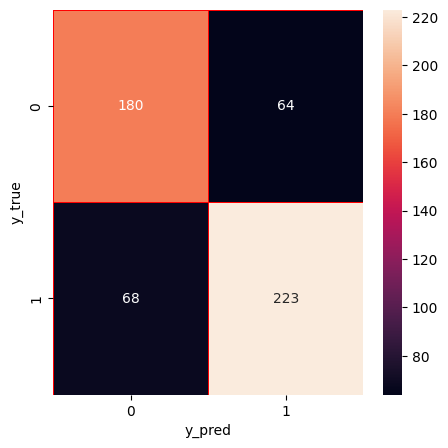

In [ ]:
y_predict = model.predict(X_test)
y_true = y_test


y_predict_binary = (y_predict >= 0.5).astype(int)


from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
score = accuracy_score(y_true, y_predict_binary)
print('Accuracy of Model: ' + str(score))


precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_predict_binary, average='weighted')
print('Precision of Model: ' + str(precision))
print('Recall of Model: ' + str(recall))
print('F1-score of Model: ' + str(fscore))
tw1a.append(score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)

print(classification_report(y_true, y_predict_binary))


cm = confusion_matrix(y_true, y_predict_binary)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


34/34 [==============================] - 6s 182ms/step
Accuracy of Model: 0.9050691244239631
Precision of Model: 0.9055199467824745
Recall of Model: 0.9050691244239631
F1-score of Model: 0.9049535170772844
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       566
           1       0.92      0.88      0.90       519

    accuracy                           0.91      1085
   macro avg       0.91      0.90      0.90      1085
weighted avg       0.91      0.91      0.90      1085



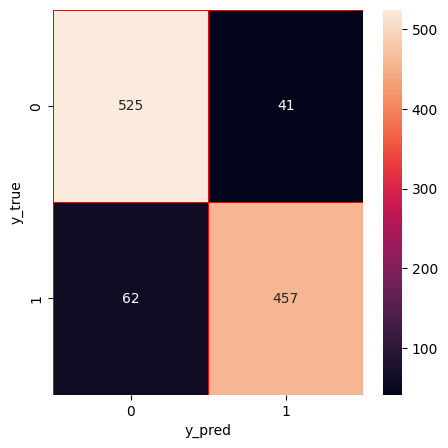

In [ ]:
y_predict = model.predict(X_train)
y_true = y_train


y_predict_binary = (y_predict >= 0.5).astype(int)


from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
score = accuracy_score(y_true, y_predict_binary)
print('Accuracy of Model: ' + str(score))


precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_predict_binary, average='weighted')
print('Precision of Model: ' + str(precision))
print('Recall of Model: ' + str(recall))
print('F1-score of Model: ' + str(fscore))
ttw1a.append(score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)

print(classification_report(y_true, y_predict_binary))


cm = confusion_matrix(y_true, y_predict_binary)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
!pip install mealpy==2.5.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 36.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from mealpy.swarm_based import GWO
from mealpy.evolutionary_based import FPA


class HybridMlp:

    def __init__(self, dataset, n_hidden_nodes, epoch, pop_size):
        self.X_train, self.y_train, self.X_test, self.y_test = dataset[0], dataset[1], dataset[2], dataset[3]
        self.n_hidden_nodes = n_hidden_nodes
        self.epoch = epoch
        self.pop_size = pop_size

        self.n_inputs = self.X_train.shape[1]
        self.model, self.problem_size, self.n_dims, self.problem = None, None, None, None
        self.optimizer, self.solution, self.best_fit = None, None, None

    def create_network(self):
        # create model
        model = Sequential()
        model.add(Dense(self.n_hidden_nodes[0], input_dim=self.n_inputs, activation='relu'))
        model.add(Dense(self.n_hidden_nodes[1], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # Compile model
        # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.model = model
        self.problem_size = self.n_dims = np.sum([np.size(w) for w in self.model.get_weights()])

    def create_problem(self):
        self.problem = {
            "fit_func": self.fitness_function,
            "lb": [-1, ] * self.n_dims,
            "ub": [1, ] * self.n_dims,
            "minmax": "max",
            "log_to": None,
            "save_population": False
        }

    def decode_solution(self, solution):
        # solution: is a vector.
        # solution = [w11, w21, w31, w12, w22, w32, b1, b2, wh11, wh21, wh12, wh22, wh13, wh23, bo1, bo2, bo3 ]
        # number of weights = n_inputs * n_hidden_nodes + n_hidden_nodes + n_hidden_nodes * n_outputs + n_outputs
        # we decode the solution into the neural network weights
        # we return the model with the new weight (weight from solution)
        weight_sizes = [(w.shape, np.size(w)) for w in self.model.get_weights()]
        # ( (3, 5),  15 )
        weights = []
        cut_point = 0
        for ws in weight_sizes:
            temp = np.reshape(solution[cut_point: cut_point + ws[1]], ws[0])
            # [0: 15], (3, 5),
            weights.append(temp)
            cut_point += ws[1]
        self.model.set_weights(weights)

    def prediction(self, solution, x_data):
        self.decode_solution(solution)
        return self.model.predict(x_data)

    def training(self):
        self.create_network()
        self.create_problem()
        self.optimizer = GWO.OriginalGWO(self.epoch, self.pop_size)
        # self.optimizer = FPA.OriginalFPA(self.problem, self.epoch, self.pop_size)
        self.solution, self.best_fit = self.optimizer.solve(self.problem)

    def fitness_function(self, solution):  # Used in training process
        # Assumption that we have 3 layer , 1 input layer, 1 hidden layer and 1 output layer
        # number of nodes are 3, 2, 3
        # solution = [w11, w21, w31, w12, w22, w32, b1, b2, wh11, wh21, wh12, wh22, wh13, wh23, bo1, bo2, bo3 ]
        self.decode_solution(solution)
        yhat = self.model.predict(self.X_train)
        yhat = np.argmax(yhat, axis=-1).astype('int')
        acc = accuracy_score(self.y_train, yhat)
        return acc



dataset = [X_train, y_train, X_test, y_test]

n_hidden_nodes = [10, 5]
epoch = 50
pop_size = 50

# define model
model = HybridMlp(dataset, n_hidden_nodes, epoch, pop_size)
# fit model
model.training()

# access to the best model - best set of weights - the final weights of neural network
# model.solution

# evaluate on test set
yhat = model.prediction(solution=model.solution, x_data=X_test)
yhat = np.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

17/17 [==============================] - 0s 3ms/step
Accuracy: 0.456


17/17 [==============================] - 0s 3ms/step
Accuracy of Model: 0.45607476635514016
Precision of Model: 0.2080041925058957
Recall of Model: 0.45607476635514016
F1-score of Model: 0.2857053735318465
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       244
           1       0.00      0.00      0.00       291

    accuracy                           0.46       535
   macro avg       0.23      0.50      0.31       535
weighted avg       0.21      0.46      0.29       535



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

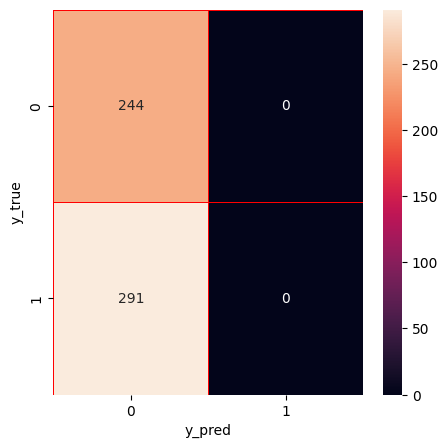

In [ ]:
yhat = model.prediction(solution=model.solution, x_data=X_test)
y_predict = np.argmax(yhat, axis=-1).astype('int')
y_true = y_test
y_predict_binary = (y_predict >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
score = accuracy_score(y_true, y_predict_binary)
print('Accuracy of Model: ' + str(score))


precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_predict_binary, average='weighted')
print('Precision of Model: ' + str(precision))
print('Recall of Model: ' + str(recall))
print('F1-score of Model: ' + str(fscore))
tw1a.append(score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)

print(classification_report(y_true, y_predict_binary))


cm = confusion_matrix(y_true, y_predict_binary)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


34/34 [==============================] - 0s 2ms/step
Accuracy of Model: 0.5216589861751152
Precision of Model: 0.272128097857249
Recall of Model: 0.5216589861751152
F1-score of Model: 0.35767290875241087
              precision    recall  f1-score   support

           0       0.52      1.00      0.69       566
           1       0.00      0.00      0.00       519

    accuracy                           0.52      1085
   macro avg       0.26      0.50      0.34      1085
weighted avg       0.27      0.52      0.36      1085



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

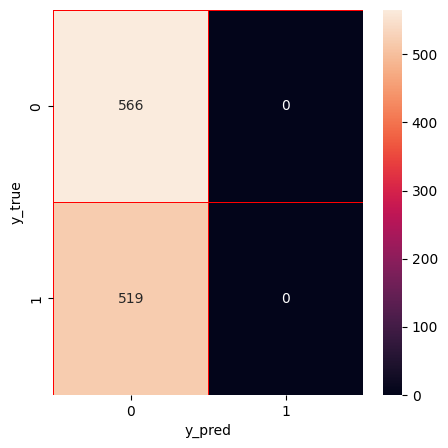

In [ ]:
yhat = model.prediction(solution=model.solution, x_data=X_train)
y_predict = np.argmax(yhat, axis=-1).astype('int')
y_true = y_train


y_predict_binary = (y_predict >= 0.5).astype(int)


from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
score = accuracy_score(y_true, y_predict_binary)
print('Accuracy of Model: ' + str(score))


precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_predict_binary, average='weighted')
print('Precision of Model: ' + str(precision))
print('Recall of Model: ' + str(recall))
print('F1-score of Model: ' + str(fscore))
ttw1a.append(score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)

print(classification_report(y_true, y_predict_binary))


cm = confusion_matrix(y_true, y_predict_binary)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Attention
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have X_train, X_test, y_train, and y_test from your dataset

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()

# First Bidirectional GRU layer with more units
model.add(Bidirectional(GRU(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, activation='relu', kernel_regularizer=l2(0.01)), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Additional Bidirectional GRU layer with more units
model.add(Bidirectional(GRU(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, activation='relu', kernel_regularizer=l2(0.01))))
model.add(Dropout(0.2))

# LSTM layer with more units
model.add(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))

# Add more layers as needed

# Flatten the output of the recurrent layers
model.add(tf.keras.layers.Flatten())

# Additional Dense Layers for classification
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/20
17/17 [==============================] - 408s 22s/step - loss: 11.3599 - accuracy: 0.4922 - val_loss: 8.1092 - val_accuracy: 0.4561
Epoch 2/20
17/17 [==============================] - 367s 22s/step - loss: 6.2756 - accuracy: 0.5217 - val_loss: 4.6659 - val_accuracy: 0.4561
Epoch 3/20
17/17 [==============================] - 366s 22s/step - loss: 3.6892 - accuracy: 0.5217 - val_loss: 2.8005 - val_accuracy: 0.4561
Epoch 4/20
17/17 [==============================] - 362s 21s/step - loss: 2.2743 - accuracy: 0.5217 - val_loss: 1.7998 - val_accuracy: 0.4561
Epoch 5/20
17/17 [==============================] - 362s 21s/step - loss: 1.5197 - accuracy: 0.5217 - val_loss: 1.2737 - val_accuracy: 0.4561
Epoch 6/20
17/17 [==============================] - 364s 22s/step - loss: 1.1265 - accuracy: 0.5217 - val_loss: 1.0011 - val_accuracy: 0.4561
Epoch 7/20
17/17 [==============================] - 345s 20s/step - loss: 0.9238 - accuracy: 0.5217 - val_loss: 0.8629 - val_accuracy: 0.4561
Epoch

17/17 [==============================] - 24s 1s/step
Accuracy of Model: 0.45607476635514016
Precision of Model: 0.2080041925058957
Recall of Model: 0.45607476635514016
F1-score of Model: 0.2857053735318465
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       244
           1       0.00      0.00      0.00       291

    accuracy                           0.46       535
   macro avg       0.23      0.50      0.31       535
weighted avg       0.21      0.46      0.29       535



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

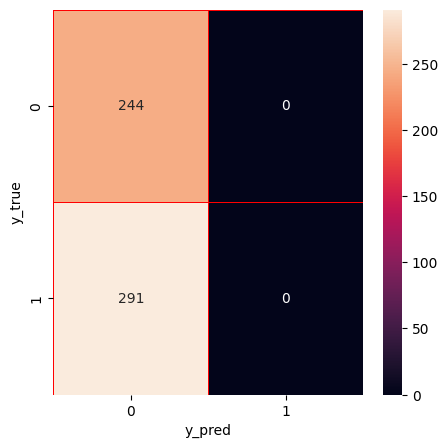

In [ ]:
y_predict = model.predict(X_test)
y_true = y_test


y_predict_binary = (y_predict >= 0.5).astype(int)


from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
score = accuracy_score(y_true, y_predict_binary)
print('Accuracy of Model: ' + str(score))


precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_predict_binary, average='weighted')
print('Precision of Model: ' + str(precision))
print('Recall of Model: ' + str(recall))
print('F1-score of Model: ' + str(fscore))
tw1a.append(score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)

print(classification_report(y_true, y_predict_binary))


cm = confusion_matrix(y_true, y_predict_binary)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


34/34 [==============================] - 43s 1s/step
Accuracy of Model: 0.5216589861751152
Precision of Model: 0.272128097857249
Recall of Model: 0.5216589861751152
F1-score of Model: 0.35767290875241087
              precision    recall  f1-score   support

           0       0.52      1.00      0.69       566
           1       0.00      0.00      0.00       519

    accuracy                           0.52      1085
   macro avg       0.26      0.50      0.34      1085
weighted avg       0.27      0.52      0.36      1085



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

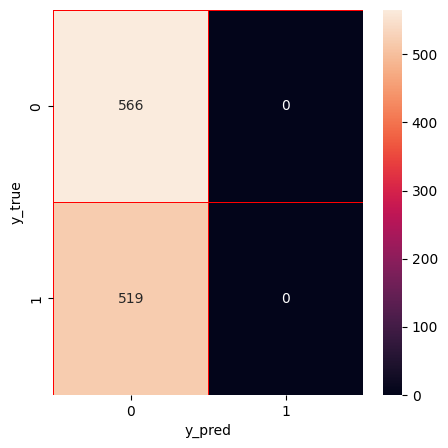

In [ ]:
y_predict = model.predict(X_train)
y_true = y_train


y_predict_binary = (y_predict >= 0.5).astype(int)


from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
score = accuracy_score(y_true, y_predict_binary)
print('Accuracy of Model: ' + str(score))


precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_predict_binary, average='weighted')
print('Precision of Model: ' + str(precision))
print('Recall of Model: ' + str(recall))
print('F1-score of Model: ' + str(fscore))
ttw1a.append(score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)

print(classification_report(y_true, y_predict_binary))


cm = confusion_matrix(y_true, y_predict_binary)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have X_train, X_test, y_train, and y_test from your dataset

# Initialize the model
model = Sequential()

# Input layer
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

# Additional dense layers with increased complexity and L2 regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')



Epoch 1/20
17/17 [==============================] - 2s 39ms/step - loss: 4.8914 - accuracy: 0.6876 - val_loss: 3.9938 - val_accuracy: 0.7327
Epoch 2/20
17/17 [==============================] - 0s 19ms/step - loss: 3.3728 - accuracy: 0.7604 - val_loss: 2.8799 - val_accuracy: 0.7140
Epoch 3/20
17/17 [==============================] - 0s 20ms/step - loss: 2.4057 - accuracy: 0.7862 - val_loss: 2.0824 - val_accuracy: 0.7551
Epoch 4/20
17/17 [==============================] - 0s 20ms/step - loss: 1.7678 - accuracy: 0.8000 - val_loss: 1.6068 - val_accuracy: 0.7421
Epoch 5/20
17/17 [==============================] - 0s 20ms/step - loss: 1.3452 - accuracy: 0.8083 - val_loss: 1.2761 - val_accuracy: 0.7720
Epoch 6/20
17/17 [==============================] - 0s 13ms/step - loss: 1.0652 - accuracy: 0.8194 - val_loss: 1.1059 - val_accuracy: 0.7514
Epoch 7/20
17/17 [==============================] - 0s 14ms/step - loss: 0.9276 - accuracy: 0.8000 - val_loss: 0.9454 - val_accuracy: 0.7551
Epoch 8/20
17

17/17 [==============================] - 0s 2ms/step
Accuracy of Model: 0.7401869158878505
Precision of Model: 0.7396834360707895
Recall of Model: 0.7401869158878505
F1-score of Model: 0.7397243553701598
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       244
           1       0.75      0.78      0.76       291

    accuracy                           0.74       535
   macro avg       0.74      0.74      0.74       535
weighted avg       0.74      0.74      0.74       535



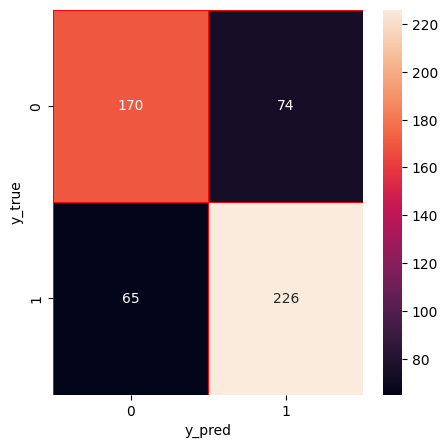

In [ ]:
y_predict = model.predict(X_test)
y_true = y_test


y_predict_binary = (y_predict >= 0.5).astype(int)


from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
score = accuracy_score(y_true, y_predict_binary)
print('Accuracy of Model: ' + str(score))


precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_predict_binary, average='weighted')
print('Precision of Model: ' + str(precision))
print('Recall of Model: ' + str(recall))
print('F1-score of Model: ' + str(fscore))
tw1a.append(score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)

print(classification_report(y_true, y_predict_binary))


cm = confusion_matrix(y_true, y_predict_binary)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


34/34 [==============================] - 0s 2ms/step
Accuracy of Model: 0.9741935483870968
Precision of Model: 0.9747527337732977
Recall of Model: 0.9741935483870968
F1-score of Model: 0.9742049995524833
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       566
           1       0.96      0.99      0.97       519

    accuracy                           0.97      1085
   macro avg       0.97      0.97      0.97      1085
weighted avg       0.97      0.97      0.97      1085



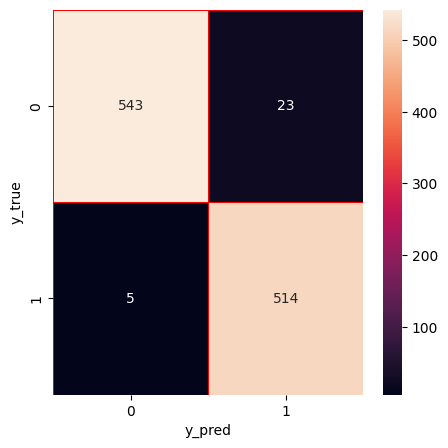

In [ ]:
y_predict = model.predict(X_train)
y_true = y_train


y_predict_binary = (y_predict >= 0.5).astype(int)


from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
score = accuracy_score(y_true, y_predict_binary)
print('Accuracy of Model: ' + str(score))


precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_predict_binary, average='weighted')
print('Precision of Model: ' + str(precision))
print('Recall of Model: ' + str(recall))
print('F1-score of Model: ' + str(fscore))
ttw1a.append(score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)

print(classification_report(y_true, y_predict_binary))


cm = confusion_matrix(y_true, y_predict_binary)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
ttw = [ttw1a,ttw1p,ttw1r,ttw1f]
tw = [tw1a,tw1p,tw1r,tw1f]
ttw = pd.DataFrame(ttw).transpose()
ttw.columns = ["Accuracy","Precision","Recall","F1Score"]
ttw.index = ["LSTM-GRU","MealPy-Hybrid-MLP","Bidirectional-GRU with LSTM","ANN"]
tw = pd.DataFrame(tw).transpose()
tw.columns = ["Accuracy","Precision","Recall","F1Score"]
tw.index = ["LSTM-GRU","MealPy-Hybrid-MLP","Bidirectional-GRU with LSTM","ANN"]


In [ ]:
df = pd.concat([ttw,tw],axis=1)

In [ ]:
df

,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score
LSTM-GRU,0.905069,0.905520,0.905069,0.904954,0.753271,0.753654,0.753271,0.753420
MealPy-Hybrid-MLP,0.521659,0.272128,0.521659,0.357673,0.456075,0.208004,0.456075,0.285705
Bidirectional-GRU with LSTM,0.521659,0.272128,0.521659,0.357673,0.456075,0.208004,0.456075,0.285705
ANN,0.974194,0.974753,0.974194,0.974205,0.740187,0.739683,0.740187,0.739724


In [ ]:
df.to_excel("output3.xlsx")